**Image Restoration**

In image processing, **Noise** refers to unwanted variations in pixel values that can distort the visual appearance of an image. Here are some common types of noise and methods to add and remove.

**Types of Noise:**

**1. Gaussian Noise:** This noise is added to an image with a Gaussian distribution, meaning it has **avariance**.

It's often caused by imperfections in the capturing or transmission process.

**To apply Gaussian noise to an image** ,  you can generate noise by  **random_noise(img, mode='gaussian', var=)** from **scikit-image Libarary** (**skimage.util**)



float64 0.0 1.0


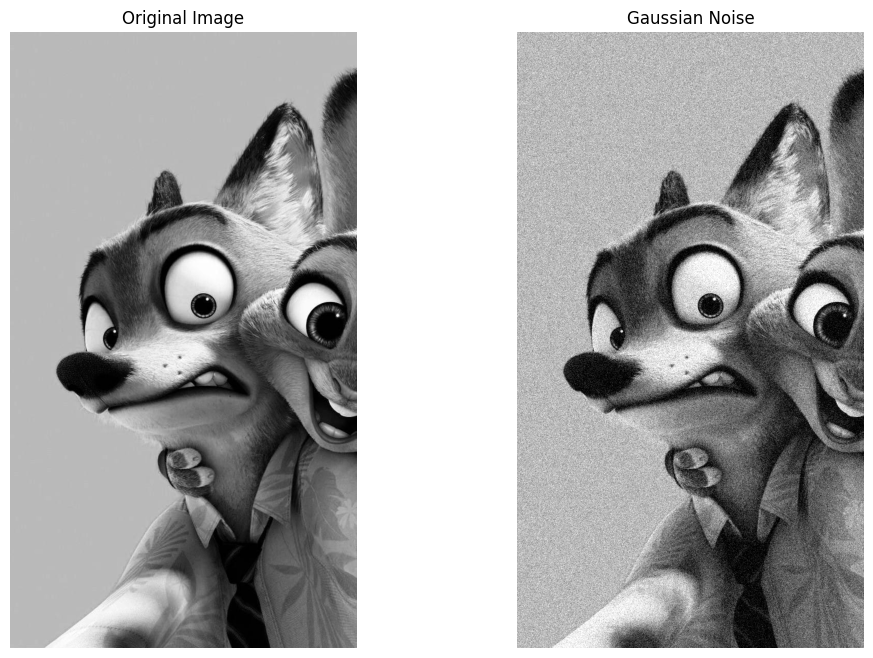

In [ ]:
from skimage.util import random_noise
import cv2
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('/content/animal.jpg',cv2.IMREAD_GRAYSCALE)

# Add Gaussian Noise
gaussian_noisy_img = random_noise(img, mode='gaussian', var=0.01)  # var is the variance of the noise
print(gaussian_noisy_img.dtype, gaussian_noisy_img.min(), gaussian_noisy_img.max())
noisy_img = (gaussian_noisy_img * 255).astype('uint8')  # Convert to uint8

cv2.imwrite('gaussian_noise.jpg', noisy_img)

# Display the images
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Gaussian Noise')
plt.imshow(gaussian_noisy_img, cmap='gray')
plt.axis('off')

plt.show()


**2. Impulse (Salt and Pepper) Noise:** This noise appears as **white (salt) or black (pepper)** pixels scattered randomly in an image. It can be caused by malfunctioning camera sensors or poor image acquisition conditions.

**To Apply Salt&Pepper Noise** , you can generate noise by  **random_noise(img, mode='s&p', amount=)** from **scikit-image Libarary** (**skimage.util**)

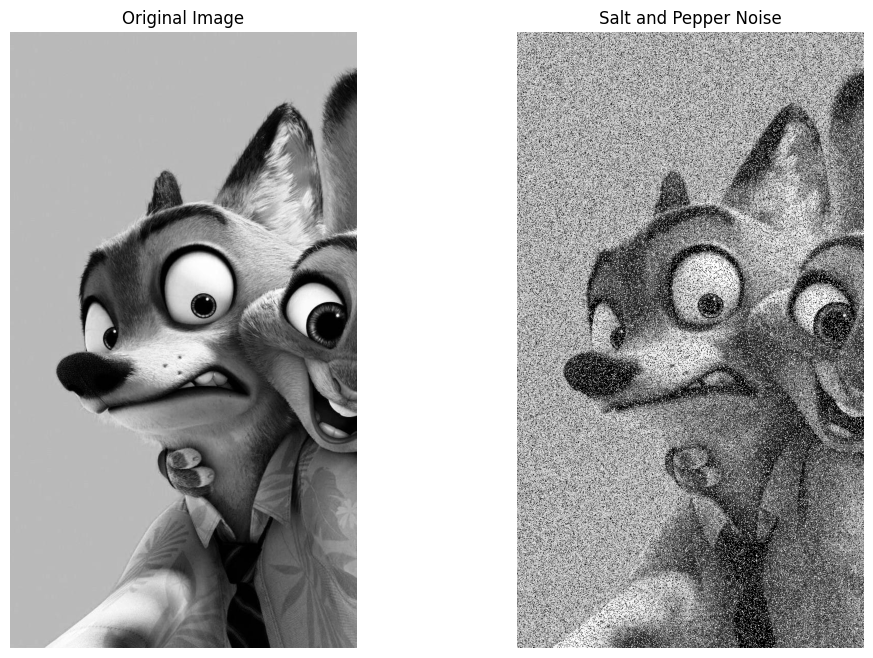

In [ ]:
from skimage.util import random_noise
import cv2
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('/content/animal.jpg',0)

# Add Salt and Pepper Noise
s_p_noisy_img = random_noise(img, mode='s&p', amount=0.3)
s_p_noisy_img = (s_p_noisy_img * 255).astype('uint8')  # Convert to uint8

cv2.imwrite('saltandpepper_noise.png', s_p_noisy_img)
# Display the images
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Salt and Pepper Noise')
plt.imshow(s_p_noisy_img, cmap='gray')
plt.axis('off')

plt.show()


**3. Uniform Noise:** is distributed evenly across a specified range, meaning all values within this range have an equal probability of occurrence.

**To Apply Uniform Noise**


*   Generate Uniform Noise :
using **np.random.uniform(min_val, max_val, img.shape)**.astype(np.int16)
*   Add noise to the image


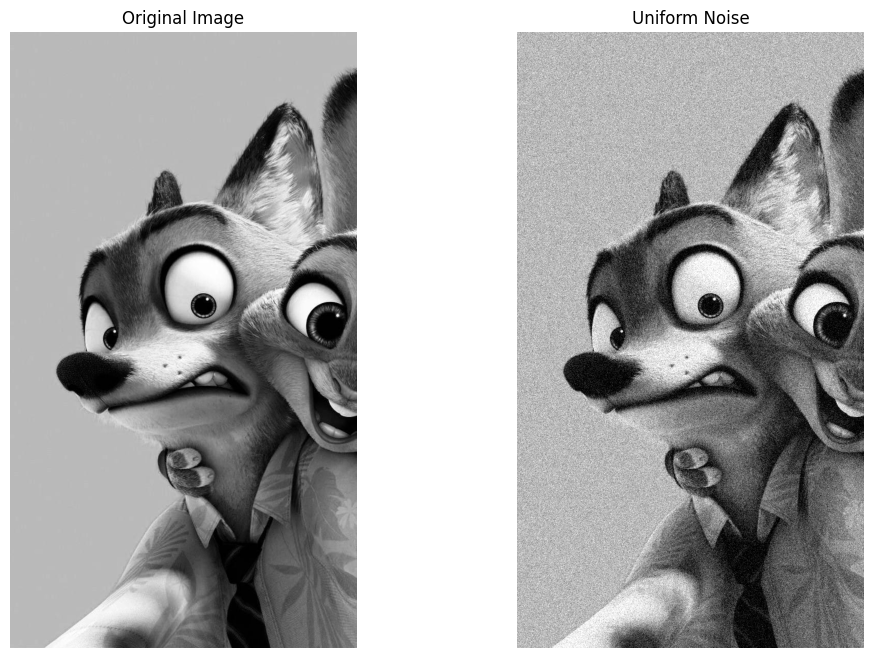

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('/content/animal.jpg', cv2.IMREAD_GRAYSCALE)

# Parameters for Uniform Noise
min_val = -50   # Minimum noise value
max_val = 50    # Maximum noise value

# Generate Uniform Noise
uniform_noise = np.random.uniform(min_val, max_val, img.shape).astype(np.int16)

# Add noise to the image
uniform_noise = img + uniform_noise

cv2.imwrite('uniform_noise.jpg', uniform_noise)

# Display the images
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Uniform Noise')
plt.imshow(noisy_img, cmap='gray')
plt.axis('off')

plt.show()


**4. Rayleigh Noise**

**To Apply Rayleigh Noise**


*   Generate Rayleigh Noise : using **np.random.rayleigh(scale,img.shape)**

*   Add noise to the image

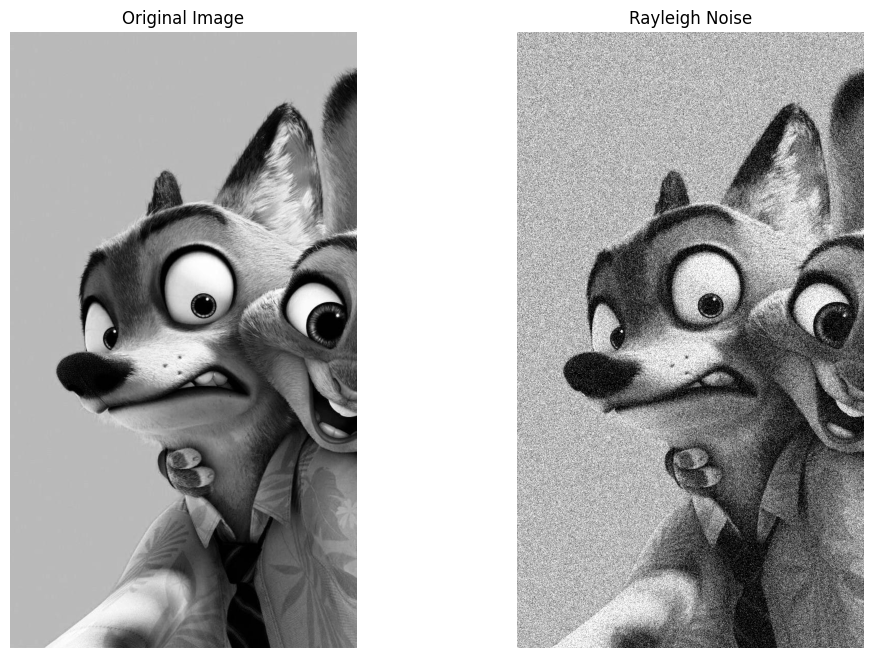

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('/content/animal.jpg', cv2.IMREAD_GRAYSCALE)

# Parameters for Rayleigh Noise
scale = 50  # Scale parameter (adjust for noise intensity)

# Generate Rayleigh Noise
rayleigh_noise = np.random.rayleigh(scale, img.shape).astype(np.float32)

# Add noise to the image
rayleigh_noise_image = img + rayleigh_noise

cv2.imwrite('rayleigh_noise.jpg', rayleigh_noise_image)

# Display the images
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Rayleigh Noise')
plt.imshow(noisy_img, cmap='gray')
plt.axis('off')

plt.show()


**Noise Reduction filters**

There are two main groups of noise reduction techniques:

**Mean filters and order statistic filters**

**1. Arithmetic Mean Filter:** is a simple and effective linear spatial filter used to remove noise from images.

This filter is especially useful for removing **Gaussian noise and Uniform noise**

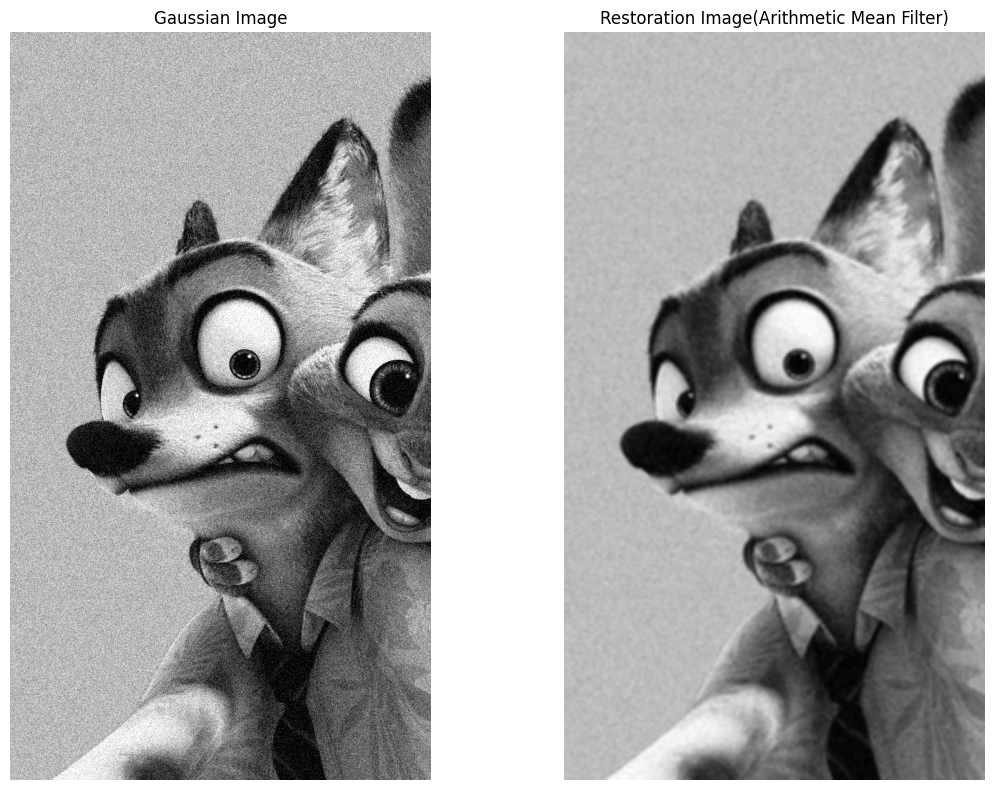

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('/content/gaussian_noise.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Arithmetic Mean Filter
kernel_size = (7, 7)  # Size of the kernel
filtered_img1 = cv2.blur(img, kernel_size)

# Display the images
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.title('Gaussian Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Restoration Image(Arithmetic Mean Filter)')
plt.imshow(filtered_img1, cmap='gray')
plt.axis('off')


plt.tight_layout()
plt.show()


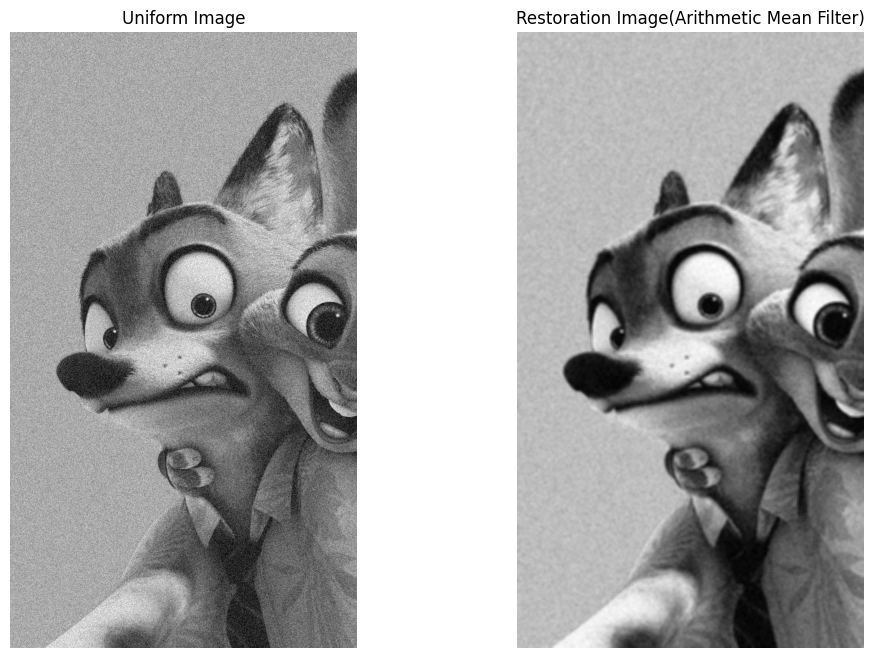

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img=cv2.imread("/content/uniform_noise.jpg",cv2.IMREAD_GRAYSCALE)
# Apply Arithmetic Mean Filter
kernel_size = (7, 7)  # Size of the kernel
filtered_img = cv2.blur(img, kernel_size)

# Display the images
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.title('Uniform Image')
plt.imshow(uniform_noise, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Restoration Image(Arithmetic Mean Filter)')
plt.imshow(filtered_img, cmap='gray')
plt.axis('off')

plt.show()


**2. Order statistic filters**

**1. The Median Filter:** The most popular and useful of the rank filters , Used to reduce **Salt&Pepper** Noise

(-0.5, 674.5, 1199.5, -0.5)

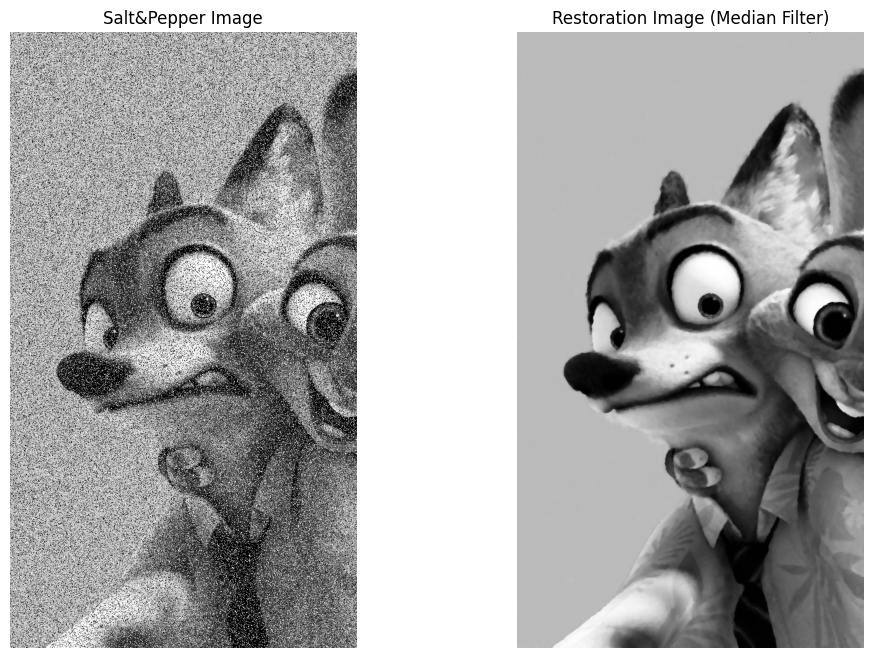

In [ ]:
img=cv2.imread("/content/saltandpepper_noise.png",cv2.IMREAD_GRAYSCALE)
# Apply the median filter

filtered_image = cv2.medianBlur(img, 7)

# Display the results
plt.figure(figsize=(12,8))

plt.subplot(1, 2, 1)
plt.title("Salt&Pepper Image")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Restoration Image (Median Filter)")
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')


**2. The Min and Max Filters**

 The **min** filter is useful for reduction of **salt** noise, whereas the **max** filter can help
remove **pepper** noise.

In [ ]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import numpy as np
# Read the image
noise_image = Image.open("/content/saltandpepper_noise.png").convert("L")


# Applying the min and max filters
image1 = noise_image.filter(ImageFilter.MinFilter(size=3))
image2 = noise_image.filter(ImageFilter.MaxFilter(size=3))

# Display the results
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.title("Salt & Pepper Image")
plt.imshow(s_p_noisy_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Restoration Image (Min Filter)")
plt.imshow(image1, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Restoration Image (Max Filter)")
plt.imshow(image2, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()



Output hidden; open in https://colab.research.google.com to view.